In [1]:
import pandas as pd


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("archive/HousingData.csv")


In [63]:
df.dropna(inplace=True)


In [64]:
df1=df.dropna()

In [65]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


# Independent Feature and dependent features

In [68]:
X=df1
y=df1.MEDV

In [69]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

# train test split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [71]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80,18.4
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8


## Standardizing the data set

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
X_train=scaler.fit_transform(X_train)

In [74]:
X_test=scaler.transform(X_test)

In [75]:
X_train

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  0.40288864,
         0.11593724, -0.2567857 ],
       [ 0.04316861, -0.48865541,  1.04820426, ..., -3.55599998,
         0.81143377, -1.03651184],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  0.35532602,
        -0.02235647, -0.39239024],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.3314929 ,
        -0.32713969, -0.49409365],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.44817157,
         0.69327992, -0.87830653],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.25325809,
         0.66642677, -0.15508229]])

In [76]:
from sklearn.linear_model import LinearRegression
# Cross validation
from sklearn.model_selection import cross_val_score

In [83]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [84]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5,error_score='raise')

In [85]:
np.mean(mse)

-2.3168586613681226e-27

## Prediction

In [86]:
reg_pred=regression.predict(X_test)

In [87]:
reg_pred

array([25. , 18.6, 21. , 23.5, 17.5, 33.8, 19.7, 24.8, 32. , 14. , 21.7,
       50. , 16.5, 20. , 20.6, 24.1, 19.4, 17.2, 50. , 11. , 18.2, 16.8,
       12.6, 24. , 22.6, 17.4, 22. , 30.8, 20.3, 22.6, 50. , 14.6, 50. ,
       20. , 19.5, 17.1, 17.4, 22. , 22.5, 21. , 26.6, 39.8, 23. , 29.4,
       34.6, 19.4, 24.7, 16.3, 19.2, 24.8, 20. , 19.4, 13.5, 19.1, 23.1,
       22.7, 50. , 22.4, 16.6, 21. , 21.7, 24.5, 14.9, 30.1,  7. , 31.7,
       14.9, 26.7, 23.8, 27.1, 35.4, 33.2, 16.1, 23. , 19.9, 38.7, 17.1,
       33.4, 15.2, 14.2, 41.7, 21.5, 21.4, 12.8, 28.6, 21.8, 20.1,  6.3,
       46. , 50. , 25. , 19.5, 22.8, 13.3, 23.9, 43.5, 28.7, 21.4, 18.7,
       13.6, 21.2, 34.9, 15. , 14.5, 15.1, 13. , 21.8, 13.4, 44.8, 21.9,
        8.1, 13.8, 24.2, 20.6, 22.7, 13.5, 23.1, 37. , 19.6])

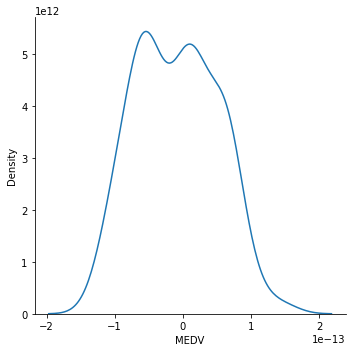

In [89]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind="kde")

In [90]:
from sklearn.metrics import r2_score

In [91]:
score=r2_score(reg_pred,y_test)

In [92]:
score

1.0